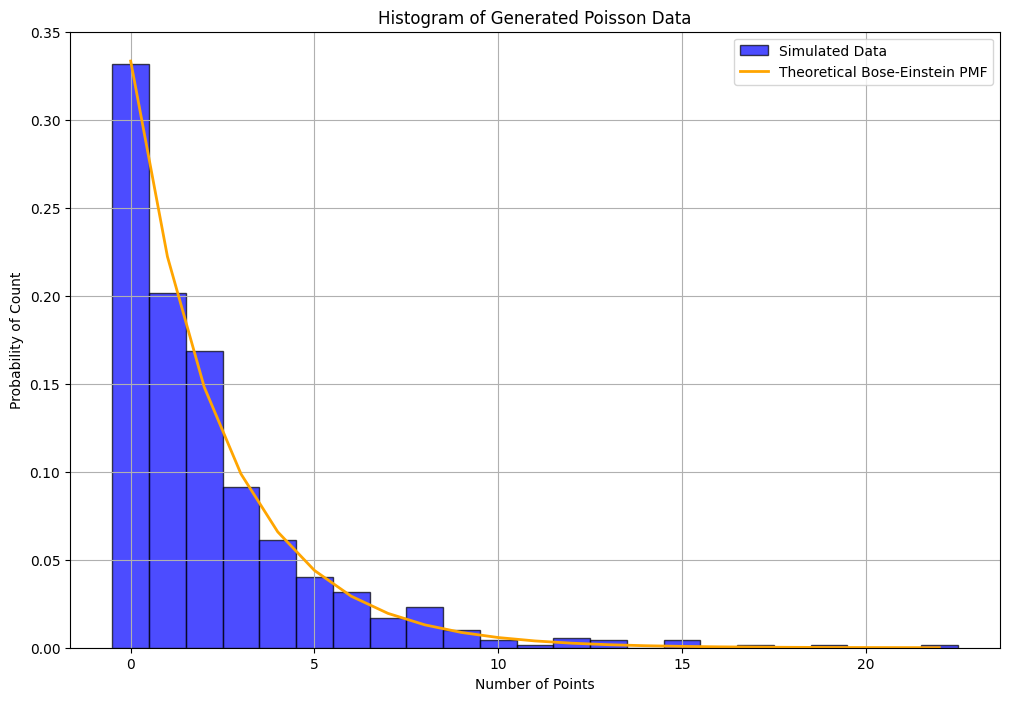

In [11]:
import matplotlib.pyplot as plt
from jax import (
    numpy as jnp,
    random as rnd,
    config
)

config.update("jax_enable_x64", True)

# Initialize parameters
Key = rnd.PRNGKey(0)
I0 = 1000
A = 2
T = 0.001
alpha = I0 * A * T
beta = 1

def generate(alpha, beta, Key, N):
    lambd = beta * rnd.exponential(key=Key, shape=(N,))
    return rnd.poisson(key=Key, lam=alpha * lambd)

X = generate(alpha, beta, Key, 700)

p = 1 / (1 + alpha * beta)
k_values = jnp.arange(0, max(X) + 1)
bose_einstein_pmf = (alpha * beta / (1 + alpha * beta)) ** k_values * p
# Plot the histogram
B= jnp.arange(min(X) - 0.5, max(X) + 1.5, 1)
plt.figure(figsize=(12, 8))
count, bins, ignored = plt.hist(X,  color='blue', edgecolor='black', alpha=0.7, density=True, label='Simulated Data',bins=B)
plt.plot(k_values, bose_einstein_pmf, 'orange', lw=2, label='Theoretical Bose-Einstein PMF')

p = 1 / (1 + alpha * beta)
k_values = jnp.arange(0, max(X) + 1)
bose_einstein_pmf = (alpha * beta / (1 + alpha * beta)) ** k_values * p
# Add title and labels
plt.title('Histogram of Generated Poisson Data')
plt.xlabel('Number of Points')
plt.ylabel('Probability of Count')

# Add grid and legend
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
